In [3]:
import nltk
nltk.download("punkt")
import numpy as np
import re
import urllib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vipul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
np.random.seed(1234)

In [5]:
# Split text into sentences
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
book = urllib.request.urlopen(url="https://raw.githubusercontent.com/Vipulbhansali/NLP-Tutorials/main/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt")
sentences = tokenizer.tokenize(str(book.read()))
print (f"{len(sentences)} sentences")
a = [i for i in sentences]
print(a[5])


4524 sentences
Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors.


In [6]:
import re

def preprocess(text):
    """Conditional preprocessing on our text."""
    # Lowercase the text
    text = text.lower()

    # Add spaces around punctuation
    text = re.sub(r"([;.,!?<=>])", r" \1 ", text)

    # Remove non-alphanumeric characters
    text = re.sub(r"[^A-Za-z0-9]+", " ", text)

    # Remove multiple spaces
    text = re.sub(r" +", " ", text)

    # Strip leading and trailing spaces
    text = text.strip()

    # Separate into word tokens
    text = text.split(" ")

    return text

In [7]:
sentences = [preprocess(sentence) for sentence in sentences]
print (sentences[5])

['mrs', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nnearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'nspent', 'so', 'much', 'of', 'her', 'time', 'craning', 'over', 'garden', 'fences', 'spying', 'on', 'the', 'nneighbors']


In [8]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [9]:
EMBEDDING_DIM = 100
WINDOW = 5
MIN_COUNT = 3 # Ignores all words with total frequency lower than this
SKIP_GRAM = 1 # 0 = CBOW
NEGATIVE_SAMPLING = 20

In [10]:
# Super fast because of optimized C code under the hood
w2v = Word2Vec(
    sentences=sentences, vector_size=EMBEDDING_DIM,
    window=WINDOW, min_count=MIN_COUNT,
    sg=SKIP_GRAM, negative=NEGATIVE_SAMPLING)
print (w2v)

Word2Vec<vocab=2738, vector_size=100, alpha=0.025>


In [11]:
# Vector for each word
w2v.wv.get_vector("potter")

array([ 0.00239046,  0.15115587, -0.08624607,  0.07235854,  0.04793083,
       -0.29698718,  0.11428867,  0.5262827 , -0.04497531,  0.1005613 ,
        0.00653014, -0.33080962, -0.37314484,  0.54512036, -0.1340483 ,
       -0.05301578, -0.16310033, -0.15985629,  0.19644679, -0.24511635,
        0.03946023, -0.14670898,  0.19885044,  0.22856681,  0.04078443,
        0.00517132, -0.16660339,  0.13507037, -0.05216093,  0.08740336,
        0.08013093, -0.2903192 ,  0.2853936 , -0.11096565, -0.10722753,
        0.02364755,  0.2385517 , -0.3771453 , -0.21696995, -0.0870261 ,
       -0.43233865, -0.28945503, -0.12832093,  0.04359055, -0.11034361,
        0.16647887,  0.06245872, -0.15339768, -0.09462172,  0.14634615,
        0.05704409, -0.00649697, -0.23659286,  0.21619911,  0.00788205,
       -0.10223782,  0.30031547, -0.246012  , -0.25720665,  0.24190444,
       -0.01097969,  0.13111319, -0.10462605, -0.13567567, -0.182154  ,
        0.24885488,  0.05517235,  0.2261623 , -0.1499511 ,  0.33

In [12]:
# Get nearest neighbors (excluding itself)
w2v.wv.most_similar(positive="bag", topn=5)

[('crossbow', 0.9984447360038757),
 ('package', 0.9983420372009277),
 ('nface', 0.998069703578949),
 ('nstill', 0.9980174899101257),
 ('throwing', 0.9980118274688721)]

In [13]:
# Saving and loading
w2v.wv.save_word2vec_format("model.bin", binary=True)
w2v = KeyedVectors.load_word2vec_format("model.bin", binary=True)

# FastText

What happens when a word doesn't exist in our vocabulary? We could assign an UNK token which is used for all OOV (out of vocabulary) words or we could use FastText, which uses character-level n-grams to embed a word. This helps embed rare words, misspelled words, and also words that don't exist in our corpus but are similar to words in our corpus.

In [14]:
from gensim.models import FastText

In [15]:
# Super fast because of optimized C code under the hood
ft = FastText(sentences=sentences, vector_size=EMBEDDING_DIM,
              window=WINDOW, min_count=MIN_COUNT,
              sg=SKIP_GRAM, negative=NEGATIVE_SAMPLING)
print (ft)

FastText<vocab=2738, vector_size=100, alpha=0.025>


In [16]:
# FastText will use n-grams to embed an OOV word
ft.wv.most_similar(positive="scarring", topn=5)

[('piercing', 0.9993692636489868),
 ('scraping', 0.9993265867233276),
 ('nceiling', 0.9993001818656921),
 ('nholding', 0.9992795586585999),
 ('dangling', 0.999183714389801)]

In [17]:
# Save and loading
ft.wv.save("model.bin")
ft = KeyedVectors.load("model.bin")

# Pretrained embeddings
We can learn embeddings from scratch using one of the approaches above but we can also leverage pretrained embeddings that have been trained on millions of documents. Popular ones include Word2Vec (skip-gram) or GloVe (global word-word co-occurrence). We can validate that these embeddings captured meaningful semantic relationships by confirming them.

### Word2Vec:
Word2Vec employs two main algorithms: Skip-gram and CBOW (Continuous Bag of Words). Skip-gram predicts context words from a target word, while CBOW predicts a target word from its context words. The model is trained on local context windows of text, using stochastic gradient descent and backpropagation. The primary goal of Word2Vec is to maximize the probability of context words given the target word (Skip-gram) or vice versa (CBOW). This focus on local context makes Word2Vec particularly effective at capturing semantic relationships between words within their immediate surroundings.

When to use Word2Vec? It is ideal for applications that benefit from understanding the local context of words, such as short text classification and chatbots. Word2Vec offers flexibility, allowing users to choose between Skip-gram and CBOW based on the specific requirements of their task. If the objective is to grasp how words relate to their immediate context, Word2Vec is an excellent choice due to its ability to capture local semantic nuances effectively.

### GloVe (Global Vectors for Word Representation):

GloVe constructs word vectors by leveraging statistical information from the entire corpus, based on a global word-word co-occurrence matrix. Unlike Word2Vec, which focuses on local context, GloVe is trained on aggregated global word-word co-occurrence statistics from a corpus and solves a weighted least squares regression model. The main aim of GloVe is to capture global statistical information, reflecting how frequently words co-occur across the whole corpus, thus providing a broader context for each word.

When to use GloVe? It is best suited for tasks that benefit from global context understanding, such as topic modeling and document similarity analysis. Leveraging pretrained GloVe embeddings is particularly advantageous when global co-occurrence statistics are crucial for the task. By capturing both local and global semantic relationships, GloVe provides comprehensive word representations, making it a valuable tool for applications that require a deep understanding of word semantics across a large corpus.

In [18]:
from gensim.scripts.glove2word2vec import glove2word2vec
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from urllib.request import urlopen
from zipfile import ZipFile

In [19]:
def plot_embeddings(words, embeddings, pca_results):
    for word in words:
        index = embeddings.index2word.index(word)
        plt.scatter(pca_results[index, 0], pca_results[index, 1])
        plt.annotate(word, xy=(pca_results[index, 0], pca_results[index, 1]))
    plt.show()

In [20]:
# Unzip the file (may take ~3-5 minutes)
resp = urlopen("http://nlp.stanford.edu/data/glove.6B.zip")
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()

['glove.6B.50d.txt',
 'glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt']

In [21]:
# Write embeddings to file
embeddings_file = "glove.6B.{0}d.txt".format(EMBEDDING_DIM)
zipfile.extract(embeddings_file)

'c:\\Users\\Vipul\\NLP-Tutorials\\glove.6B.100d.txt'

In [22]:
# Preview of the GloVe embeddings file
with open(embeddings_file, "r") as fp:
    line = next(fp)
    values = line.split()
    word = values[0]
    embedding = np.asarray(values[1:], dtype='float32')
    print (f"word: {word}")
    print (f"embedding:\n{embedding}")
    print (f"embedding dim: {len(embedding)}")


word: the
embedding:
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459


In [23]:
# Save GloVe embeddings to local directory in word2vec format
word2vec_output_file = "{0}.word2vec".format(embeddings_file)
glove2word2vec(embeddings_file, word2vec_output_file)

C:\Users\Vipul\AppData\Local\Temp\ipykernel_19120\3028217428.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(embeddings_file, word2vec_output_file)


(400000, 100)

In [24]:
# Load embeddings (may take a minute)
glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [25]:
# (king - man) + woman = ?
# king - man = ? -  woman
glove.most_similar(positive=["woman", "king"], negative=["man"], topn=5)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991)]

In [26]:
# Get nearest neighbors (excluding itself)
glove.most_similar(positive="messi", topn=5)

[('ronaldinho', 0.8303644061088562),
 ("eto'o", 0.804193377494812),
 ('iniesta', 0.7608727216720581),
 ('saviola', 0.7573608756065369),
 ('ronaldo', 0.7426354289054871)]

In [27]:
# Bias in embeddings
glove.most_similar(positive=["woman", "doctor"], negative=["man"], topn=5)

[('nurse', 0.7735227942466736),
 ('physician', 0.7189430594444275),
 ('doctors', 0.6824328303337097),
 ('patient', 0.6750683188438416),
 ('dentist', 0.6726033091545105)]

# Model Setup

In [28]:
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn

In [29]:
SEED = 1234

def set_seeds(seed=1234):
    """Set seeds for reproducibility."""
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # multi-GPU

In [30]:
# Set seeds for reproducibility
set_seeds(seed=SEED)

In [31]:
# Set device
cuda = True
device = torch.device("cuda" if (
    torch.cuda.is_available() and cuda) else "cpu")
torch.set_default_tensor_type("torch.FloatTensor")
if device.type == "cuda":
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
print (device)

cpu


c:\Users\Vipul\miniconda3\envs\NLP-TUTORIAL\lib\site-packages\torch\__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


## Load data
We will download the AG News dataset, which consists of 120K text samples from 4 unique classes (Business, Sci/Tech, Sports, World)

In [53]:
df = pd.read_csv(r"C:\Users\Vipul\NLP-Tutorials\news.csv")

In [54]:
df.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [55]:
df.rename(columns={"Class Index": "category", "Title" : "title"}, inplace=True)

In [56]:
df.drop(columns=["Description"], inplace=True)


In [57]:
df.head(5)

,category,title
0,3,Wall St. Bears Claw Back Into the Black (Reuters)
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters)
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [58]:
df['category'].dtype

dtype('int64')

In [59]:
print(df['category'].unique())


[3 4 2 1]


In [60]:
category_mapping = {1: 'Business', 2: 'Sci/Tech', 3: 'Sports', 4: 'World'}


df['category'] = df['category'].map(category_mapping)


df.head(5)

,category,title
0,Sports,Wall St. Bears Claw Back Into the Black (Reuters)
1,Sports,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Sports,Oil and Economy Cloud Stocks' Outlook (Reuters)
3,Sports,Iraq Halts Oil Exports from Main Southern Pipe...
4,Sports,"Oil prices soar to all-time record, posing new..."


## Preprocessing

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [62]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
print (STOPWORDS[:5])
porter = PorterStemmer()

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vipul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def preprocess(text, stopwords=STOPWORDS):
    """Conditional preprocessing on our text unique to our task."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub("", text)

    # Remove words in parenthesis
    text = re.sub(r"\([^)]*\)", "", text)

    # Spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text) # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()

    return text

In [64]:
# Sample
text = "Great week for the Messi!"
preprocess(text=text)

'great week messi'

In [65]:
# Apply to dataframe
preprocessed_df = df.copy()
preprocessed_df.title = preprocessed_df.title.apply(preprocess)
print (f"{df.title.values[0]}\n\n{preprocessed_df.title.values[0]}")

Wall St. Bears Claw Back Into the Black (Reuters)

wall st bears claw back black


## Split Data

In [66]:
import collections
from sklearn.model_selection import train_test_split

In [67]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [68]:
def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, stratify=y_)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [69]:
# Data
X = preprocessed_df["title"].values
y = preprocessed_df["category"].values

In [70]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")

X_train: (84000,), y_train: (84000,)
X_val: (18000,), y_val: (18000,)
X_test: (18000,), y_test: (18000,)
Sample point: nysac chairman 39 39 time bleeding stopped 39 → Sci/Tech


## Label encoding

In [71]:
import itertools

In [72]:
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index or {}  # mutable defaults ;)
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(y)
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        encoded = np.zeros((len(y)), dtype=int)
        for i, item in enumerate(y):
            encoded[i] = self.class_to_index[item]
        return encoded

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            classes.append(self.index_to_class[item])
        return classes

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {'class_to_index': self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [73]:
# Encode
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
NUM_CLASSES = len(label_encoder)
label_encoder.class_to_index

{'Business': 0, 'Sci/Tech': 1, 'Sports': 2, 'World': 3}

In [74]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = label_encoder.encode(y_train)
y_val = label_encoder.encode(y_val)
y_test = label_encoder.encode(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: Sci/Tech
y_train[0]: 1


In [76]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [21000 21000 21000 21000]
weights: {0: 4.761904761904762e-05, 1: 4.761904761904762e-05, 2: 4.761904761904762e-05, 3: 4.761904761904762e-05}


## Tokenizer

In [84]:
import json


from collections import Counter
from more_itertools import take

In [85]:
class Tokenizer(object):
    def __init__(self, char_level, num_tokens=None,
                 pad_token="<PAD>", oov_token="<UNK>",
                 token_to_index=None):
        self.char_level = char_level
        self.separator = "" if self.char_level else " "
        if num_tokens: num_tokens -= 2 # pad + unk tokens
        self.num_tokens = num_tokens
        self.pad_token = pad_token
        self.oov_token = oov_token
        if not token_to_index:
            token_to_index = {pad_token: 0, oov_token: 1}
        self.token_to_index = token_to_index
        self.index_to_token = {v: k for k, v in self.token_to_index.items()}

    def __len__(self):
        return len(self.token_to_index)

    def __str__(self):
        return f"<Tokenizer(num_tokens={len(self)})>"

    def fit_on_texts(self, texts):
        if not self.char_level:
            texts = [text.split(" ") for text in texts]
        all_tokens = [token for text in texts for token in text]
        counts = Counter(all_tokens).most_common(self.num_tokens)
        self.min_token_freq = counts[-1][1]
        for token, count in counts:
            index = len(self)
            self.token_to_index[token] = index
            self.index_to_token[index] = token
        return self

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            if not self.char_level:
                text = text.split(" ")
            sequence = []
            for token in text:
                sequence.append(self.token_to_index.get(
                    token, self.token_to_index[self.oov_token]))
            sequences.append(np.asarray(sequence))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for sequence in sequences:
            text = []
            for index in sequence:
                text.append(self.index_to_token.get(index, self.oov_token))
            texts.append(self.separator.join([token for token in text]))
        return texts

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {
                "char_level": self.char_level,
                "oov_token": self.oov_token,
                "token_to_index": self.token_to_index
            }
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [86]:
# Tokenize
tokenizer = Tokenizer(char_level=False, num_tokens=5000)
tokenizer.fit_on_texts(texts=X_train)
VOCAB_SIZE = len(tokenizer)
print (tokenizer)

<Tokenizer(num_tokens=5000)>


In [87]:
# Sample of tokens
print (take(5, tokenizer.token_to_index.items()))
print (f"least freq token's freq: {tokenizer.min_token_freq}") # use this to adjust num_tokens

[('<PAD>', 0), ('<UNK>', 1), ('39', 2), ('b', 3), ('gt', 4)]
least freq token's freq: 14


In [88]:
# Convert texts to sequences of indices
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)
preprocessed_text = tokenizer.sequences_to_texts([X_train[0]])[0]
print ("Text to indices:\n"
    f"  (preprocessed) → {preprocessed_text}\n"
    f"  (tokenized) → {X_train[0]}")

Text to indices:
  (preprocessed) → <UNK> chairman 39 39 time <UNK> <UNK> 39
  (tokenized) → [   1 1409    2    2   64    1    1    2]


## Embedding layer

In [89]:
# Input
vocab_size = 10
x = torch.randint(high=vocab_size, size=(1,5))
print (x)
print (x.shape)

tensor([[5, 1, 6, 5, 6]])
torch.Size([1, 5])


In [90]:
# Embedding layer
embeddings = nn.Embedding(embedding_dim=100, num_embeddings=vocab_size)
print (embeddings.weight.shape)

torch.Size([10, 100])


In [91]:
# Embed the input
embeddings(x).shape

torch.Size([1, 5, 100])

## Padding

In [ ]:
def pad_sequences(sequences, max_seq_len=0):
    """Pad sequences to max length in sequence."""
    max_seq_len = max(max_seq_len, max(len(sequence) for sequence in sequences))
    padded_sequences = np.zeros((len(sequences), max_seq_len))
    for i, sequence in enumerate(sequences):
        padded_sequences[i][:len(sequence)] = sequence
    return padded_sequences

In [ ]:
# 2D sequences
padded = pad_sequences(X_train[0:3])
print (padded.shape)
print (padded)

## Dataset
We're going to create Datasets and DataLoaders to be able to efficiently create batches with our data splits.

In [94]:
FILTER_SIZES = list(range(1, 4)) # uni, bi and tri grams

In [92]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, max_filter_size):
        self.X = X
        self.y = y
        self.max_filter_size = max_filter_size

    def __len__(self):
        return len(self.y)

    def __str__(self):
        return f"<Dataset(N={len(self)})>"

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        return [X, y]

    def collate_fn(self, batch):
        """Processing on a batch."""
        # Get inputs
        batch = np.array(batch)
        X = batch[:, 0]
        y = batch[:, 1]

        # Pad sequences
        X = pad_sequences(X)

        # Cast
        X = torch.LongTensor(X.astype(np.int32))
        y = torch.LongTensor(y.astype(np.int32))

        return X, y

    def create_dataloader(self, batch_size, shuffle=False, drop_last=False):
        return torch.utils.data.DataLoader(
            dataset=self, batch_size=batch_size, collate_fn=self.collate_fn,
            shuffle=shuffle, drop_last=drop_last, pin_memory=True)

In [95]:
# Create datasets
max_filter_size = max(FILTER_SIZES)
train_dataset = Dataset(X=X_train, y=y_train, max_filter_size=max_filter_size)
val_dataset = Dataset(X=X_val, y=y_val, max_filter_size=max_filter_size)
test_dataset = Dataset(X=X_test, y=y_test, max_filter_size=max_filter_size)
print ("Datasets:\n"
    f"  Train dataset:{train_dataset.__str__()}\n"
    f"  Val dataset: {val_dataset.__str__()}\n"
    f"  Test dataset: {test_dataset.__str__()}\n"
    "Sample point:\n"
    f"  X: {train_dataset[0][0]}\n"
    f"  y: {train_dataset[0][1]}")

Datasets:
  Train dataset:<Dataset(N=84000)>
  Val dataset: <Dataset(N=18000)>
  Test dataset: <Dataset(N=18000)>
Sample point:
  X: [   1 1409    2    2   64    1    1    2]
  y: 1


In [ ]:
# Create dataloaders
batch_size = 64
train_dataloader = train_dataset.create_dataloader(batch_size=batch_size)
val_dataloader = val_dataset.create_dataloader(batch_size=batch_size)
test_dataloader = test_dataset.create_dataloader(batch_size=batch_size)
batch_X, batch_y = next(iter(train_dataloader))
print ("Sample batch:\n"
    f"  X: {list(batch_X.size())}\n"
    f"  y: {list(batch_y.size())}\n"
    "Sample point:\n"
    f"  X: {batch_X[0]}\n"
    f"  y: {batch_y[0]}")

# Model
We'll be using a convolutional neural network on top of our embedded tokens to extract meaningful spatial signal. This time, we'll be using many filter widths to act as n-gram feature extractors.

Let's visualize the model's forward pass.

- We'll first tokenize our inputs (batch_size, max_seq_len).

- Then we'll embed our tokenized inputs (batch_size, max_seq_len, embedding_dim).

- We'll apply convolution via filters (filter_size, embedding_dim, num_filters) followed by batch normalization. Our filters act as character level n-gram detectors. We have three different filter sizes (2, 3 and 4) and they will act as bi-gram, tri-gram and 4-gram feature extractors, respectively.

- We'll apply 1D global max pooling which will extract the most relevant information from the feature maps for making the decision.

- We feed the pool outputs to a fully-connected (FC) layer (with dropout).
- We use one more FC layer with softmax to derive class probabilities.

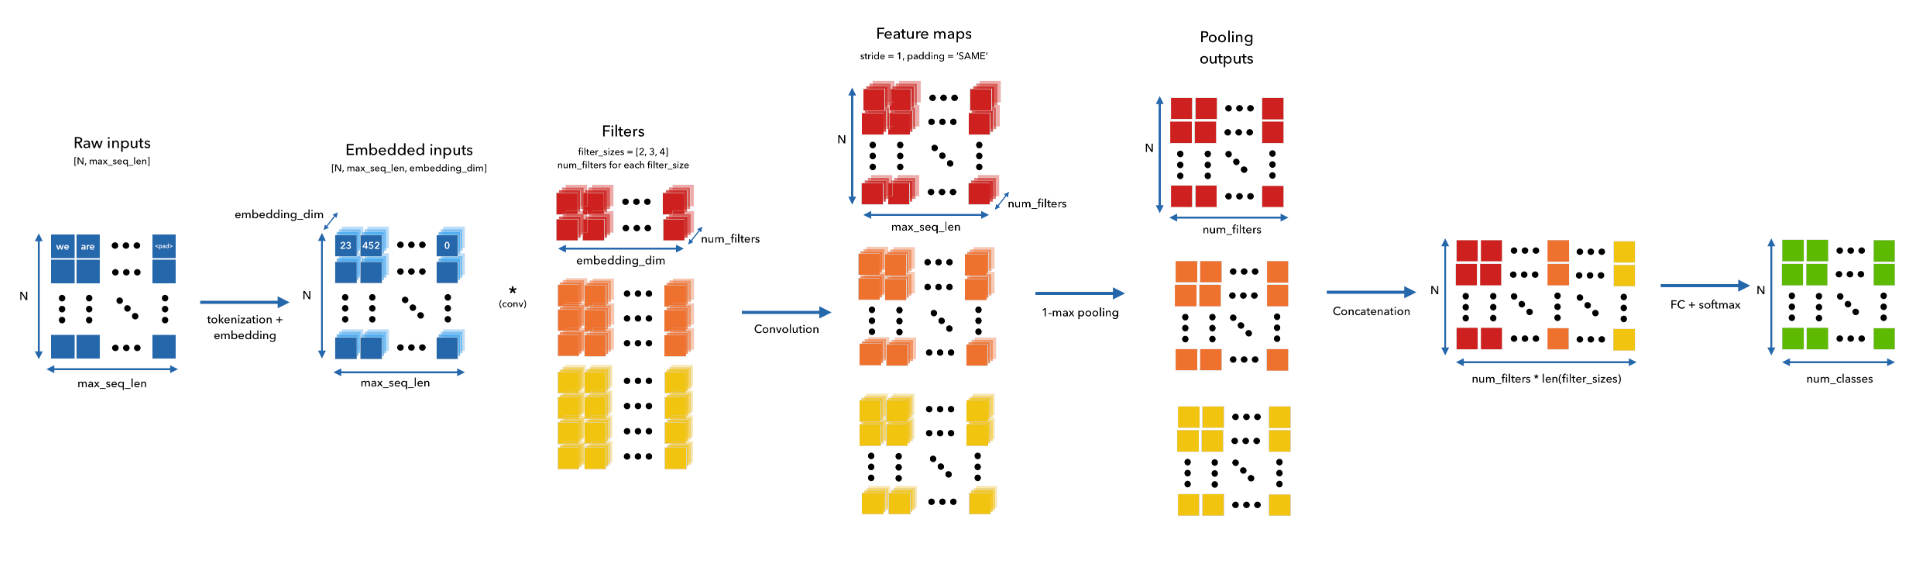

In [97]:
import math
import torch.nn.functional as F
EMBEDDING_DIM = 100
HIDDEN_DIM = 100
DROPOUT_P = 0.1

In [ ]:
class CNN(nn.Module):
    def __init__(self, embedding_dim, vocab_size, num_filters,
                 filter_sizes, hidden_dim, dropout_p, num_classes,
                 pretrained_embeddings=None, freeze_embeddings=False,
                 padding_idx=0):
        super(CNN, self).__init__()

        # Filter sizes
        self.filter_sizes = filter_sizes

        # Initialize embeddings
        if pretrained_embeddings is None:
            self.embeddings = nn.Embedding(
                embedding_dim=embedding_dim, num_embeddings=vocab_size,
                padding_idx=padding_idx)
        else:
            pretrained_embeddings = torch.from_numpy(pretrained_embeddings).float()
            self.embeddings = nn.Embedding(
                embedding_dim=embedding_dim, num_embeddings=vocab_size,
                padding_idx=padding_idx, _weight=pretrained_embeddings)

        # Freeze embeddings or not
        if freeze_embeddings:
            self.embeddings.weight.requires_grad = False

        # Conv weights
        self.conv = nn.ModuleList(
            [nn.Conv1d(in_channels=embedding_dim,
                       out_channels=num_filters,
                       kernel_size=f) for f in filter_sizes])

        # FC weights
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(num_filters*len(filter_sizes), hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, inputs, channel_first=False):

        # Embed
        x_in, = inputs
        x_in = self.embeddings(x_in)

        # Rearrange input so num_channels is in dim 1 (N, C, L)
        if not channel_first:
            x_in = x_in.transpose(1, 2)

        # Conv outputs
        z = []
        max_seq_len = x_in.shape[2]
        for i, f in enumerate(self.filter_sizes):
            # `SAME` padding
            padding_left = int((self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2)
            padding_right = int(math.ceil((self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2))

            # Conv + pool
            _z = self.conv[i](F.pad(x_in, (padding_left, padding_right)))
            _z = F.max_pool1d(_z, _z.size(2)).squeeze(2)
            z.append(_z)

        # Concat conv outputs
        z = torch.cat(z, 1)

        # FC layers
        z = self.fc1(z)
        z = self.dropout(z)
        z = self.fc2(z)
        return z

# Using GloVe
We're going create some utility functions to be able to load the pretrained GloVe embeddings into our Embeddings layer.

In [ ]:
def load_glove_embeddings(embeddings_file):
    """Load embeddings from a file."""
    embeddings = {}
    with open(embeddings_file, "r") as fp:
        for index, line in enumerate(fp):
            values = line.split()
            word = values[0]
            embedding = np.asarray(values[1:], dtype='float32')
            embeddings[word] = embedding
    return embeddings

In [ ]:
def make_embeddings_matrix(embeddings, word_index, embedding_dim):
    """Create embeddings matrix to use in Embedding layer."""
    embedding_matrix = np.zeros((len(word_index), embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
# Create embeddings
embeddings_file = 'glove.6B.{0}d.txt'.format(EMBEDDING_DIM)
glove_embeddings = load_glove_embeddings(embeddings_file=embeddings_file)
embedding_matrix = make_embeddings_matrix(
    embeddings=glove_embeddings, word_index=tokenizer.token_to_index,
    embedding_dim=EMBEDDING_DIM)
print (f"<Embeddings(words={embedding_matrix.shape[0]}, dim={embedding_matrix.shape[1]})>")

# Experiments
We have first have to decide whether to use pretrained embeddings randomly initialized ones. Then, we can choose to freeze our embeddings or continue to train them using the supervised data (this could lead to overfitting). Here are the three experiments we're going to conduct:

- Randomly initialized embeddings (fine-tuned)
- GloVe embeddings (frozen)
- GloVe embeddings (fine-tuned)


More examples are :

- Pre-Trained Contextual Embeddings (e.g., BERT)
- Combined Embeddings. (e.g., concatenate GloVe and BERT embeddings)

In [98]:
import json
from sklearn.metrics import precision_recall_fscore_support
from torch.optim import Adam
NUM_FILTERS = 50
LEARNING_RATE = 1e-3
PATIENCE = 5
NUM_EPOCHS = 10

In [99]:
class Trainer(object):
    def __init__(self, model, device, loss_fn=None, optimizer=None, scheduler=None):

        # Set params
        self.model = model
        self.device = device
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.scheduler = scheduler

    def train_step(self, dataloader):
        """Train step."""
        # Set model to train mode
        self.model.train()
        loss = 0.0

        # Iterate over train batches
        for i, batch in enumerate(dataloader):

            # Step
            batch = [item.to(self.device) for item in batch]  # Set device
            inputs, targets = batch[:-1], batch[-1]
            self.optimizer.zero_grad()  # Reset gradients
            z = self.model(inputs)  # Forward pass
            J = self.loss_fn(z, targets)  # Define loss
            J.backward()  # Backward pass
            self.optimizer.step()  # Update weights

            # Cumulative Metrics
            loss += (J.detach().item() - loss) / (i + 1)

        return loss

    def eval_step(self, dataloader):
        """Validation or test step."""
        # Set model to eval mode
        self.model.eval()
        loss = 0.0
        y_trues, y_probs = [], []

        # Iterate over val batches
        with torch.inference_mode():
            for i, batch in enumerate(dataloader):

                # Step
                batch = [item.to(self.device) for item in batch]  # Set device
                inputs, y_true = batch[:-1], batch[-1]
                z = self.model(inputs)  # Forward pass
                J = self.loss_fn(z, y_true).item()

                # Cumulative Metrics
                loss += (J - loss) / (i + 1)

                # Store outputs
                y_prob = F.softmax(z).cpu().numpy()
                y_probs.extend(y_prob)
                y_trues.extend(y_true.cpu().numpy())

        return loss, np.vstack(y_trues), np.vstack(y_probs)

    def predict_step(self, dataloader):
        """Prediction step."""
        # Set model to eval mode
        self.model.eval()
        y_probs = []

        # Iterate over val batches
        with torch.inference_mode():
            for i, batch in enumerate(dataloader):

                # Forward pass w/ inputs
                inputs, targets = batch[:-1], batch[-1]
                z = self.model(inputs)

                # Store outputs
                y_prob = F.softmax(z).cpu().numpy()
                y_probs.extend(y_prob)

        return np.vstack(y_probs)

    def train(self, num_epochs, patience, train_dataloader, val_dataloader):
        best_val_loss = np.inf
        for epoch in range(num_epochs):
            # Steps
            train_loss = self.train_step(dataloader=train_dataloader)
            val_loss, _, _ = self.eval_step(dataloader=val_dataloader)
            self.scheduler.step(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = self.model
                _patience = patience  # reset _patience
            else:
                _patience -= 1
            if not _patience:  # 0
                print("Stopping early!")
                break

            # Logging
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.5f}, "
                f"val_loss: {val_loss:.5f}, "
                f"lr: {self.optimizer.param_groups[0]['lr']:.2E}, "
                f"_patience: {_patience}"
            )
        return best_model

In [100]:
def get_metrics(y_true, y_pred, classes):
    """Per-class performance metrics."""
    # Performance
    performance = {"overall": {}, "class": {}}

    # Overall performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    performance["overall"]["precision"] = metrics[0]
    performance["overall"]["recall"] = metrics[1]
    performance["overall"]["f1"] = metrics[2]
    performance["overall"]["num_samples"] = np.float64(len(y_true))

    # Per-class performance
    metrics = precision_recall_fscore_support(y_true, y_pred, average=None)
    for i in range(len(classes)):
        performance["class"][classes[i]] = {
            "precision": metrics[0][i],
            "recall": metrics[1][i],
            "f1": metrics[2][i],
            "num_samples": np.float64(metrics[3][i]),
        }

    return performance

## Random initialization

In [ ]:
PRETRAINED_EMBEDDINGS = None
FREEZE_EMBEDDINGS = False

# Initialize model
model = CNN(
    embedding_dim=EMBEDDING_DIM, vocab_size=VOCAB_SIZE,
    num_filters=NUM_FILTERS, filter_sizes=FILTER_SIZES,
    hidden_dim=HIDDEN_DIM, dropout_p=DROPOUT_P, num_classes=NUM_CLASSES,
    pretrained_embeddings=PRETRAINED_EMBEDDINGS, freeze_embeddings=FREEZE_EMBEDDINGS)
model = model.to(device) # set device
print (model.named_parameters)

In [ ]:
# Define Loss
class_weights_tensor = torch.Tensor(list(class_weights.values())).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [ ]:
# Define optimizer & scheduler
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=3)

In [ ]:
# Trainer module
trainer = Trainer(
    model=model, device=device, loss_fn=loss_fn,
    optimizer=optimizer, scheduler=scheduler)

In [ ]:
# Train
best_model = trainer.train(
    NUM_EPOCHS, PATIENCE, train_dataloader, val_dataloader)

In [ ]:
# Get predictions
test_loss, y_true, y_prob = trainer.eval_step(dataloader=test_dataloader)
y_pred = np.argmax(y_prob, axis=1)

In [ ]:
# Determine performance
performance = get_metrics(
    y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance["overall"], indent=2))

## Glove (frozen)

In [ ]:
PRETRAINED_EMBEDDINGS = embedding_matrix
FREEZE_EMBEDDINGS = True

## Glove (fine-tuned)

In [ ]:
PRETRAINED_EMBEDDINGS = embedding_matrix
FREEZE_EMBEDDINGS = False